## Lab 2 - Applied Machine Learning (DT4031, DT4033) VT26

### Instructions
##### Flu Shot Learning: Predicting H1N1 and Seasonal Flu Vaccines
Vaccination is one of the key measures in global health to reduce spread of infection, diseases and death, as well as decrease both costs and workload in healthcare. One flu known for its annual vaccination is the seasonal flu, caused by Influenza A. This type of flu is particularly persistent and mutating, which makes it necessary to keep developing the existing vaccine in order to give some protection to people at risk. Another known influenza is the H1N1 flu, also known as the swine flu. In 2009, this flu was declared to be a pandemic by the World Health Organization due to its widespread infections and high rates of mortality. In addition to the normal seasonal flu vaccine, a separate vaccine was developed for this particular influenza with improved efficiency of reducing the rates and seriousness of the illness. Millions of doses were given across populations in the world in order to overcome the pandemic. 

This is a multilabel classification task where your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines using information they shared about their backgrounds, opinions, and health behaviours. Specifically, you will be predicting two probabilities: one for h1n1_vaccine and one for seasonal_vaccine. This will be done for multiple classifiers, which results you will then compare and analyze. 

The data comes from the National 2009 H1N1 Flu Survey (NHFS), which was a list-assisted random-digit-dialing telephone survey, designed to monitor influenza immunization coverage in the 2009-10 season. The target population was people older than 6 months in the United States. Each row in the dataset represents one person who responded to the survey. 

You can read more about the dataset and the challenge this lab is based upon here: https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/  

### Submission 
* Submit all your code as a single Jupyter notebook.
* Structured report that includes Introduction, Method, Results, Discussion. The results should contain the evaluation, including figures comparing the different classifiers. The report should NOT contain any code. An analysis should be performed on the results, comparing the different classifiers to each other and the effect of optimizing some hyperparameters. The discussion should additionally contain contemplations guided by the questions in the lab, regarding data exploration, method choices, effects of feature selections, and evaluation. 


In [158]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno 
import seaborn as sns



### Part 1

In [160]:
df_features = pd.read_csv("features.csv")
df_labels = pd.read_csv("labels.csv")
df = pd.concat([df_features, df_labels], axis = 1)
df


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,26702,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,26703,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,26704,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,26705,0,0


#### Data description 
Make sure you spend some time understanding the data. Answer the following questions (for example using figures): 
* In the data, how many people took the H1N1 vaccine vs the seasonal vaccine? How many didn't take it? 
* Which columns hold categorical data and which hold numerical data (including binary)? 
* Is there an imbalance in the data, considering the labels? 
* Choose 3 columns and check if they have any boundary violations by comparing the values to the description of what values it should contain (given in the link above). 

In [161]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,13353.000000,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,6676.500000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,13353.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,20029.500000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,26706.000000,1.000000,1.000000


In [162]:
print(df["h1n1_vaccine"].value_counts().sort_index())
print(df["seasonal_vaccine"].value_counts().sort_index())
both_vaccines_count = df[(df["h1n1_vaccine"] == 1) & (df["seasonal_vaccine"] == 1)].shape[0]
print(both_vaccines_count)

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64
seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64
4697


In [163]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical columns:", categorical_cols)
print("\nNumerical (including binary) columns:", numerical_cols)

Categorical columns: ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']

Numerical (including binary) columns: ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children', 'respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']


In [164]:
vaccine_counts = pd.DataFrame(
	{
		"h1n1_vaccine": df["h1n1_vaccine"].value_counts().sort_index(),
		"seasonal_vaccine": df["seasonal_vaccine"].value_counts().sort_index(),
	}
)
vaccine_counts.index = ["did_not_take", "took"]

imbalance_ratio = vaccine_counts.loc["did_not_take"] / vaccine_counts.loc["took"]
vaccine_counts, imbalance_ratio

(              h1n1_vaccine  seasonal_vaccine
 did_not_take         21033             14272
 took                  5674             12435,
 h1n1_vaccine        3.706909
 seasonal_vaccine    1.147728
 dtype: float64)

In [165]:

h1n1_concern_violations = df[(df['h1n1_concern'] < 0) | (df['h1n1_concern'] > 3)]['h1n1_concern'].value_counts()
print("h1n1_concern violations (should be 0-3):")
print(f"  Valid range violations: {len(h1n1_concern_violations)}")

household_adults_violations = df[(df['household_adults'] < 0) | (df['household_adults'] > 3)]['household_adults'].value_counts()
print("\nhousehold_adults violations (should be 0-3):")
print(f"  Valid range violations: {len(household_adults_violations)}")

opinion_violations = df[(df['opinion_h1n1_vacc_effective'] < 1) | (df['opinion_h1n1_vacc_effective'] > 5)]['opinion_h1n1_vacc_effective'].value_counts()
print("\nopinion_h1n1_vacc_effective violations (should be 1-5):")
print(f"  Valid range violations: {len(opinion_violations)}")


h1n1_concern violations (should be 0-3):
  Valid range violations: 0

household_adults violations (should be 0-3):
  Valid range violations: 0

opinion_h1n1_vacc_effective violations (should be 1-5):
  Valid range violations: 0


#### Some quick preprocessing
When we look at df.describe() we can see that the count between the different features vary, which indicates that there are missing values we need to take care of. Let's investigate.  

In [166]:
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

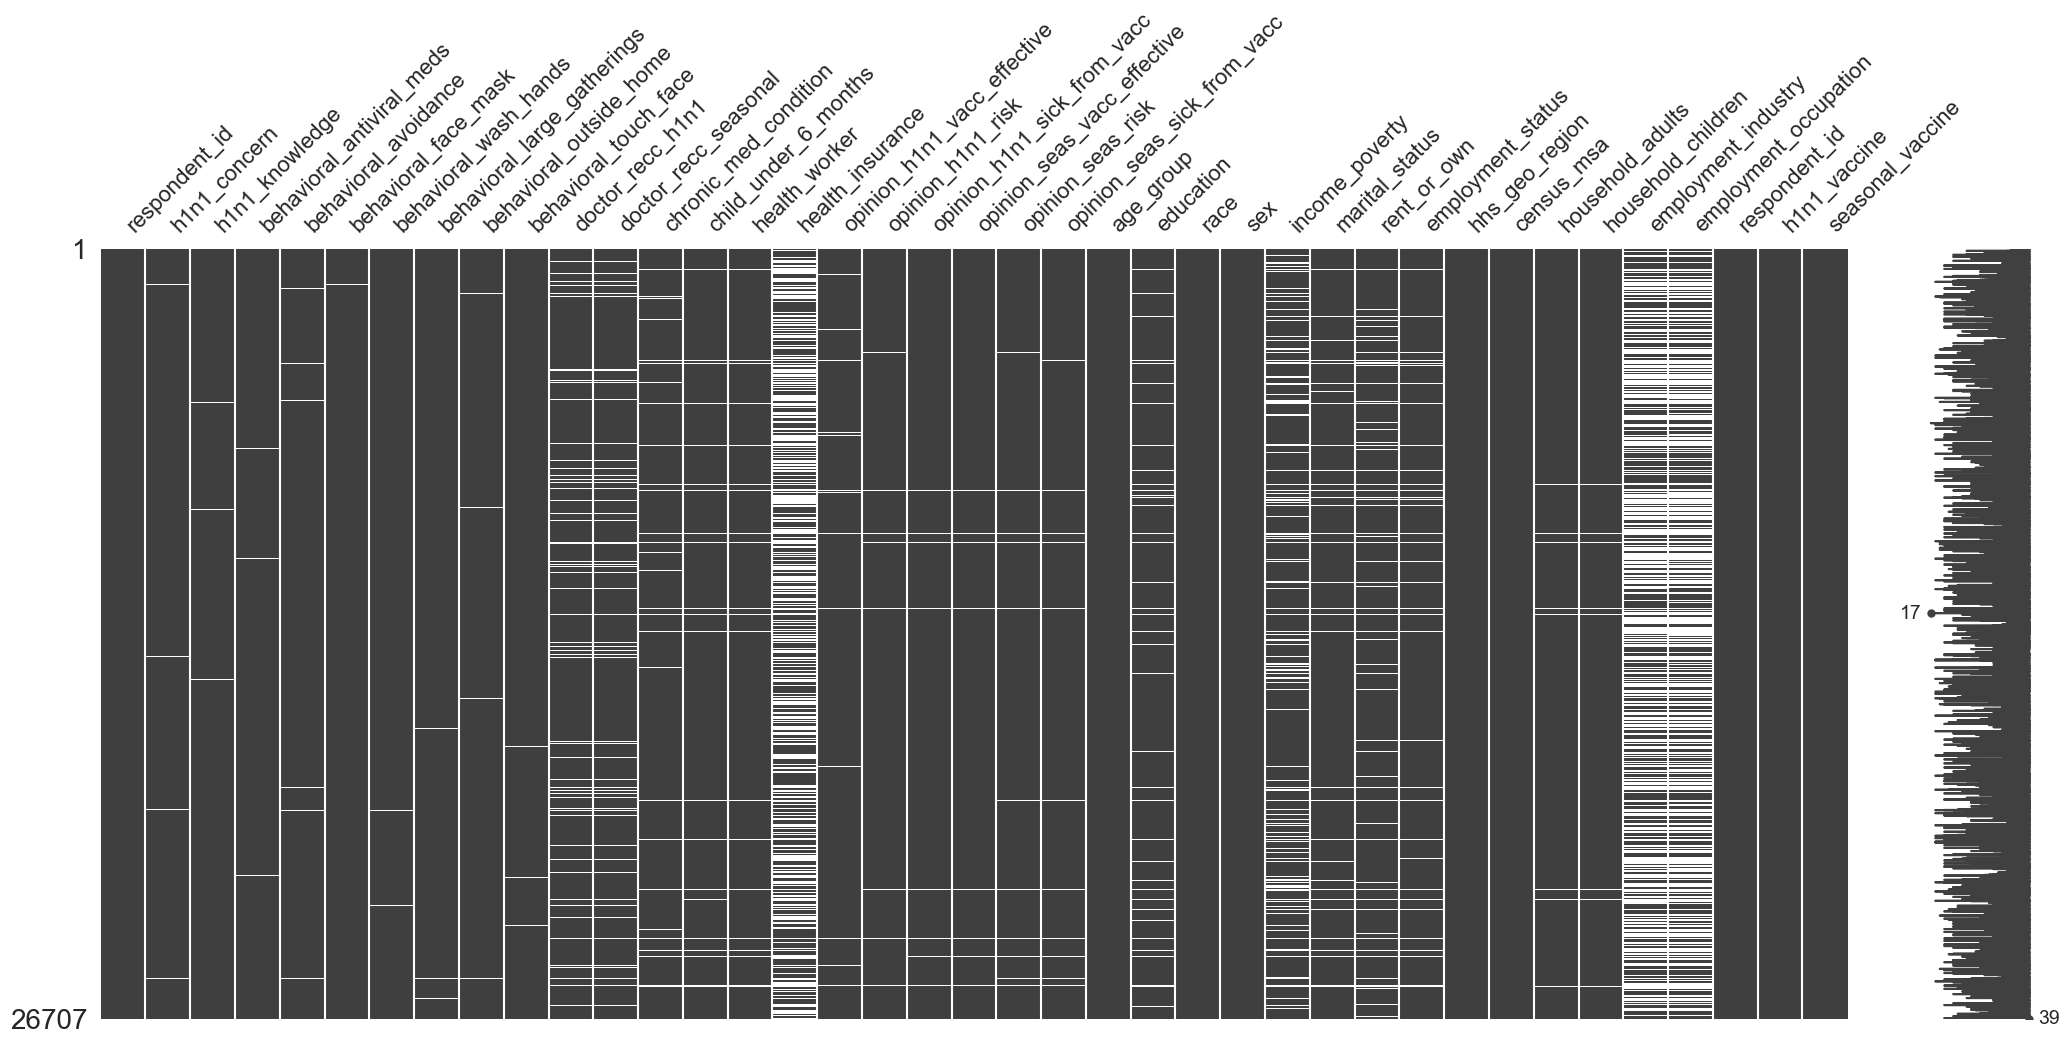

In [167]:
msno.matrix(df)
plt.show()

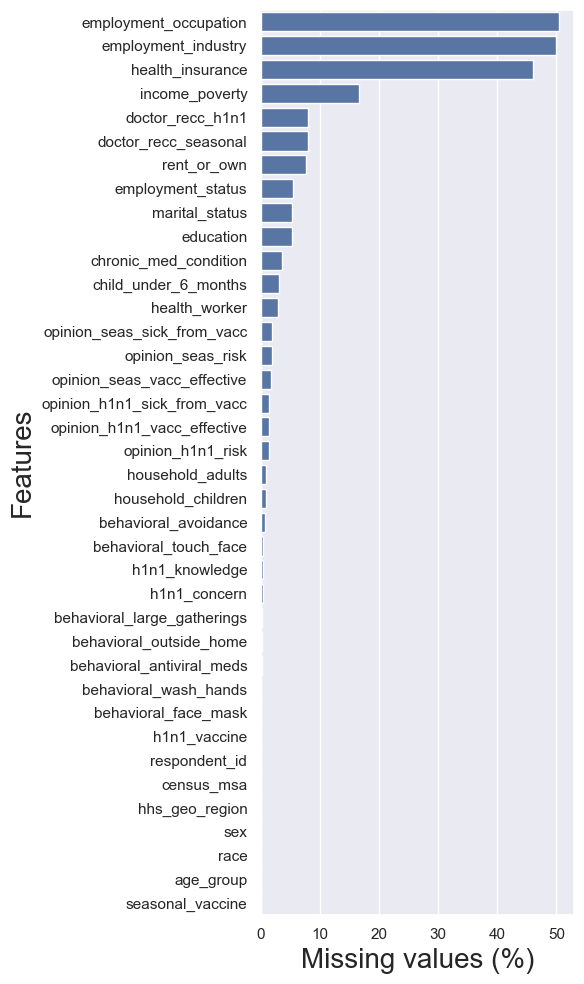

In [168]:
missing_values_df = df.isna().sum()

features = []
missing = []

for x in missing_values_df:
    missing.append((x / df.shape[0]) * 100) 
    
for feature in df:
    features.append(feature)
    
data = {'Features': features, 'Missing': missing}

missing_values = pd.DataFrame(data)
missing_values = missing_values.sort_values(by=["Missing"], ascending=[False])
sns.set(rc={'figure.figsize':(6,10)})
missing_plot = sns.barplot(y="Features", x ='Missing', data=missing_values)

plt.xlabel("Missing values (%)", fontsize=20)
plt.ylabel("Features", fontsize=20)
plt.tight_layout()
plt.show()

Looking at the information above, decide which features have a very high amount of missing values. What potential problem could arise from including these features in the dataset during model training? Consider the impact of removing these based on your reasoning, decide which features are most appropriate to exclude. This could be none, some, or all of them.


 

In [169]:
df = df.drop(columns=['health_insurance', 'employment_industry', 'employment_occupation']) #add the chosen features in the brackets

Now we fix the remaining missing values. We will impute numerical and categorical features seperately. For categorical features we will for simplicity use the most frequent values to impute with. 

Before we impute we need to split our dataset. This is due to not wanting to leak any data while imputing. If we imputed with the test data, the training data could be influenced and the test data would thereby not be unseen. Therefore, we will fit the imputer to the training data and use it to transform our test and validation dataset. 

In [170]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["h1n1_vaccine", "seasonal_vaccine"])
y = df[["h1n1_vaccine", "seasonal_vaccine"]]


X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #add size of split
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42) #add size of split



print("Missing values in X_train:", X_train.isna().sum().sum())
print("Missing values in X_validation:", X_val.isna().sum().sum()) 
print("Missing values in X_test:", X_test.isna().sum().sum()) 
print("Missing values in y_train:", y_train.isna().sum().sum()) #should already be 0
print("Missing values in y_validation:", y_val.isna().sum().sum()) #should already be 0
print("Missing values in y_test:", y_test.isna().sum().sum()) #should already be 0



Missing values in X_train: 12271
Missing values in X_validation: 3912
Missing values in X_test: 5505
Missing values in y_train: 0
Missing values in y_validation: 0
Missing values in y_test: 0


In [171]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer


num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns #numerical columns
cat_cols = X_train.select_dtypes(include=["object"]).columns #categorical columns

#numerical
num_imputer = IterativeImputer(random_state=42)
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

#categorical
cat_imputer = SimpleImputer(strategy="most_frequent")
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])


In [172]:
#these should be 0 if imputed correctly
print("Missing values in X_train:", X_train.isna().sum().sum())
print("Missing values in X_validation:", X_val.isna().sum().sum()) 
print("Missing values in X_test:", X_test.isna().sum().sum()) 
print("Missing values in y_train:", y_train.isna().sum().sum())
print("Missing values in y_validation:", y_val.isna().sum().sum()) 
print("Missing values in y_test:", y_test.isna().sum().sum()) 

Missing values in X_train: 0
Missing values in X_validation: 0
Missing values in X_test: 0
Missing values in y_train: 0
Missing values in y_validation: 0
Missing values in y_test: 0


#### Feature selection

When it comes to working with real-world datasets, they are often messy and can contain hundreds or even thousands of features for every instance. This can become problematic as high dimensionality can negatively affect model performance (see the curse of dimensionality) while many features may contribute little to the model's decision-making process. 

Feature selection is a data pre-processing method used to reduce the number of features in a dataset by identifying redundant and irrelevant features. This can help the model to, among other things, reduce the risk of overfitting, decrease computational requirements and facilitate interpretability of results. 

There are multiple approaches to feature selection, ranging from automated algorithms to conceptual methods based on common sense, domain knowledge and data-quality considerations. You already did some feature selection when handling features with a lot of missing values. 

Consider all features in the dataset in the context of the task: a multilabel classification of H1N1 and sesonal flu vaccination. Are there any features that could give one label more direct information than the other? How might this affect model learning, and which features, if any, might you consider removing to ensure the model receives comparable information for both labels? 

In [173]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'respondent_id',
       'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [174]:

cols_to_drop = ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'employment_status']
""" 
respondent_id is just an identifier with no predictive value.
h1n1_concern and h1n1_knowledge are H1N1-specific features that provide direct information only for the H1N1 label, creating an unfair information imbalance where H1N1 receives more targeted predictive features than seasonal.
 """

X_train = X_train.drop(columns=cols_to_drop)
X_val = X_val.drop(columns=cols_to_drop)
X_test = X_test.drop(columns=cols_to_drop)


In [175]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape) #make sure it matches 

(15022, 29) (5008, 29) (6677, 29)
(15022, 2) (5008, 2) (6677, 2)


Now that we have relevant candidates for features, we will try an algorithm feature selection technique called SelectKBest. SelectKBest score each feature independently against the target variable using a statistical test, and then selects the top K features with the highest scores. This means that the features are based on the scoring function. 
Read more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html. 

As the task is multilabel, we will use the f_classif scoring function seperately for each target variable. For each feature, we will calculate its score for both H1N1 and seasonal vaccines, and then compute an average score to identify features that are important for both targets. This requires numerical values, so first we will be encoding these. Please note that using the average, we are considering which features are the most important for both targets at once. If we want to achieve better performance for the task, getting the most important features for each target would probably yield better results. However, for simplicity, we are considering both at the same time. If you are interested and feel confident in changing more of the code, you can try making separate models and feature selections for the different targets, but this is not a requirement. 

In [176]:
from sklearn.preprocessing import OneHotEncoder

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns #numerical columns
cat_cols = X_train.select_dtypes(include=["object"]).columns #categorical columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train[cat_cols])
X_val_encoded = encoder.transform(X_val[cat_cols])
X_test_encoded = encoder.transform(X_test[cat_cols])

X_train_cat = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(cat_cols)).reset_index(drop=True)
X_val_cat = pd.DataFrame(X_val_encoded, columns=encoder.get_feature_names_out(cat_cols)).reset_index(drop=True)
X_test_cat = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(cat_cols)).reset_index(drop=True)

X_train = pd.concat([X_train[num_cols].reset_index(drop=True), X_train_cat], axis=1)
X_val= pd.concat([X_val[num_cols].reset_index(drop=True), X_val_cat], axis=1)
X_test = pd.concat([X_test[num_cols].reset_index(drop=True), X_test_cat], axis=1)

print(X_train.shape, X_val.shape, X_test.shape) #the amount of columns should now have increased


(15022, 55) (5008, 55) (6677, 55)


In [177]:
from sklearn.feature_selection import SelectKBest, f_classif

selector_h1n1 = SelectKBest(score_func=f_classif, k='all')
selector_h1n1.fit(X_train, y_train["h1n1_vaccine"])
h1n1_scores = pd.DataFrame({"Feature": X_train.columns,"F_score_h1n1": selector_h1n1.scores_})

selector_seasonal = SelectKBest(score_func=f_classif, k='all')
selector_seasonal.fit(X_train, y_train["seasonal_vaccine"])
seasonal_scores = pd.DataFrame({"Feature": X_train.columns,"F_score_seasonal": selector_seasonal.scores_})

feature_scores = pd.merge(h1n1_scores, seasonal_scores, on="Feature")
feature_scores["Average_score"] = feature_scores[["F_score_h1n1","F_score_seasonal"]].mean(axis=1)

feature_scores = feature_scores.sort_values(by="Average_score", ascending=False).reset_index(drop=True)

feature_scores.head(15) #change here to see more or less features


,Feature,F_score_h1n1,F_score_seasonal,Average_score
0,opinion_seas_risk,1108.548466,2544.758416,1826.653441
1,doctor_recc_h1n1,2654.603792,579.520648,1617.062220
2,doctor_recc_seasonal,703.123950,2236.395800,1469.759875
3,opinion_seas_vacc_effective,515.463996,2254.378633,1384.921314
4,opinion_h1n1_risk,1727.811063,727.003110,1227.407086
5,opinion_h1n1_vacc_effective,1186.697673,692.777074,939.737373
6,age_group_65+ Years,3.461789,926.249501,464.855645
7,health_worker,501.627337,260.061243,380.844290
8,age_group_18 - 34 Years,10.241026,483.733191,246.987108
9,chronic_med_condition,106.925927,354.816491,230.871209


Looking at the feature scores, do you think they make sense? Why/why not? Then choose a k below. As this is multilabel, we will choose the features based on their average scores. Normally you could use the transform method for this (non-multilabel), but here we do it a bit more manual. 

In [178]:
top_k = 6 #the number of features you want to keep based on average score
top_features = feature_scores["Feature"].head(top_k).tolist()
print("Top features by average score:", list(top_features))

X_train = X_train[top_features]
X_val = X_val[top_features]
X_test = X_test[top_features]

print(X_train.shape, X_val.shape, X_test.shape) #should match your chosen features 

Top features by average score: ['opinion_seas_risk', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_vacc_effective']
(15022, 6) (5008, 6) (6677, 6)


### Part 2 
#### Training

Finally training time! We've implemented two models for you below. The code uses a MultiOutputClassifier (https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) that fits one classifier per target. If you want to, you can instead train one model for each target. Model number 1 is a decision tree: 

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


base_tree = DecisionTreeClassifier(random_state=42)
multi_tree = MultiOutputClassifier(base_tree)

multi_tree.fit(X_train, y_train)

y_val_pred = multi_tree.predict(X_val)

print("Accuracy (val): ", accuracy_score(y_val, y_val_pred))

print("Validation Metrics")
print(classification_report(y_val, y_val_pred, target_names=["H1N1", "Seasonal"], zero_division=0))


Accuracy (val):  0.6134185303514377
Validation Metrics
              precision    recall  f1-score   support

        H1N1       0.58      0.44      0.50      1063
    Seasonal       0.70      0.71      0.70      2345

   micro avg       0.67      0.62      0.65      3408
   macro avg       0.64      0.57      0.60      3408
weighted avg       0.66      0.62      0.64      3408
 samples avg       0.32      0.32      0.31      3408



Most often models don't perform well immediately but require some hyperparameter optimization to reach a more satisfactory result. You can check the individual models parameters to check what you can try to optimize. For the decision tree, the depth of tree can be crucial. Try picking a suitable range of depth for better performance. 

Note that since we use a MultiOutputClassifier, the accuracy shows over both target variables. This means we will hence optimize for both target variables at once, and only get one set of hyperparameters. Most likely, this is not the most optimal hyperparameters for the target variables individually. If you want, you can change this and train two models individually, and in extension probably receive better performance. 

In [180]:
# Hyperparameter tuning for H1N1
max_depth_h1n1 = []
accuracies_h1n1 = []
for i in range(1, 16):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(X_train, y_train["h1n1_vaccine"])
    pred = dt.predict(X_val)
    accuracy = round(accuracy_score(y_val["h1n1_vaccine"], pred), 5)
    max_depth_h1n1.append(i)
    accuracies_h1n1.append(accuracy)

dt_h1n1_tuning_df = pd.DataFrame({
    'max_depth': max_depth_h1n1,
    'h1n1_accuracy': accuracies_h1n1
})

# Hyperparameter tuning for Seasonal
max_depth_seasonal = []
accuracies_seasonal = []
for i in range(1, 16):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(X_train, y_train["seasonal_vaccine"])
    pred = dt.predict(X_val)
    accuracy = round(accuracy_score(y_val["seasonal_vaccine"], pred), 5)
    max_depth_seasonal.append(i)
    accuracies_seasonal.append(accuracy)

dt_seasonal_tuning_df = pd.DataFrame({
    'max_depth': max_depth_seasonal,
    'seasonal_accuracy': accuracies_seasonal
})

# Combine for comparison
decision_tree_hyperparameter_tuning_df = pd.concat([dt_h1n1_tuning_df, dt_seasonal_tuning_df['seasonal_accuracy']], axis=1)
decision_tree_hyperparameter_tuning_df

,max_depth,h1n1_accuracy,seasonal_accuracy
0,1,0.79133,0.68510
1,2,0.81629,0.71506
2,3,0.82069,0.73103
3,4,0.82129,0.73822
4,5,0.82169,0.73762
5,6,0.82248,0.73622
6,7,0.82268,0.73303
7,8,0.82248,0.73083
8,9,0.82069,0.72983
9,10,0.81929,0.73163


In [181]:
# Choose optimal hyperparameters for each target
optimal_max_depth_h1n1 = 7 # choose based on tuning results above
optimal_max_depth_seasonal = 4 # choose based on tuning results above

# Train final Decision Tree models with optimal parameters
optimal_dt_h1n1 = DecisionTreeClassifier(max_depth=optimal_max_depth_h1n1, random_state=42)
optimal_dt_h1n1.fit(X_train, y_train["h1n1_vaccine"])
optimal_dt_h1n1_pred = optimal_dt_h1n1.predict(X_test)
optimal_dt_h1n1_pred_prob = optimal_dt_h1n1.predict_proba(X_test)

optimal_dt_seasonal = DecisionTreeClassifier(max_depth=optimal_max_depth_seasonal, random_state=42)
optimal_dt_seasonal.fit(X_train, y_train["seasonal_vaccine"])
optimal_dt_seasonal_pred = optimal_dt_seasonal.predict(X_test)
optimal_dt_seasonal_pred_prob = optimal_dt_seasonal.predict_proba(X_test)

# Combine predictions and probabilities
optimal_decision_tree_pred = pd.DataFrame({
    "h1n1_vaccine": optimal_dt_h1n1_pred,
    "seasonal_vaccine": optimal_dt_seasonal_pred
})

optimal_decision_tree_y_preds = pd.DataFrame({
    "h1n1_vaccine": optimal_dt_h1n1_pred_prob[:, 1],
    "seasonal_vaccine": optimal_dt_seasonal_pred_prob[:, 1]
})

# Create list of probability arrays for evaluation function (same format as MultiOutputClassifier.predict_proba)
optimal_decision_tree_pred_prob = [optimal_dt_h1n1_pred_prob, optimal_dt_seasonal_pred_prob]

Model number two is an ensemble learning model called AdaBoost. Read more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html 

In [182]:
from sklearn.ensemble import AdaBoostClassifier

basic_ada_boost_model = AdaBoostClassifier(algorithm="SAMME")
basic_ada_boost_multi_model= MultiOutputClassifier(basic_ada_boost_model)
basic_ada_boost_multi_model=basic_ada_boost_multi_model.fit(X_train, y_train)
basic_ada_boost_y_pred = basic_ada_boost_multi_model.predict(X_val)

print("Accuracy (val): ", accuracy_score(y_val, basic_ada_boost_y_pred))

print("Validation Metrics")
print(classification_report(y_val, basic_ada_boost_y_pred, target_names=["H1N1", "Seasonal"], zero_division=0))


Accuracy (val):  0.6295926517571885
Validation Metrics
              precision    recall  f1-score   support

        H1N1       0.64      0.37      0.47      1063
    Seasonal       0.75      0.68      0.71      2345

   micro avg       0.72      0.58      0.64      3408
   macro avg       0.69      0.52      0.59      3408
weighted avg       0.71      0.58      0.63      3408
 samples avg       0.32      0.30      0.30      3408



Similarly, we will try some basic optimization here. Choose which numbers of estimators you'd like to try and choose the one that works the best. 


In [183]:
accuracies_test = []
accuracies_train = []

n_estimators = [1, 2, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50, 100] #choose which values to try 

for est in n_estimators:     
    ada_boost_model = AdaBoostClassifier(n_estimators=est, algorithm="SAMME")
    ada_boost_multi_model= MultiOutputClassifier(ada_boost_model)
    ada_boost_multi_model=ada_boost_multi_model.fit(X_train, y_train)
    ada_boost_y_pred = ada_boost_multi_model.predict(X_val)
    ada_boost_y_train_pred = ada_boost_multi_model.predict(X_train)
    accuracy_test = accuracy_score(y_val, ada_boost_y_pred)
    accuracy_train = accuracy_score(y_train, ada_boost_y_train_pred)
    accuracies_test.append(accuracy_test)
    accuracies_train.append(accuracy_train)
    

ada_hpo = pd.DataFrame({'n_estimators': n_estimators, 'Accuracy train': accuracies_train, 'Accuracy val': accuracies_test})
ada_hpo

,n_estimators,Accuracy train,Accuracy val
0,1,0.562708,0.554712
1,2,0.562708,0.554712
2,4,0.614698,0.610823
3,5,0.625483,0.622604
4,6,0.631008,0.627396
5,7,0.631474,0.625399
6,8,0.630941,0.627396
7,9,0.636999,0.630192
8,10,0.631873,0.628395
9,15,0.633205,0.625998


In [184]:
optimal_nestimators = 9 #choose your value from last cell
optimal_ada_boost_model = AdaBoostClassifier(n_estimators = optimal_nestimators, algorithm = "SAMME")
optimal_ada_boost_multi_model= MultiOutputClassifier(optimal_ada_boost_model)
optimal_ada_boost_multi_model=optimal_ada_boost_multi_model.fit(X_train, y_train)
optimal_ada_boost_y_pred = optimal_ada_boost_multi_model.predict(X_test) #predict hold-out data
optimal_ada_boost_pred_prob = optimal_ada_boost_multi_model.predict_proba(X_test)
optimal_ada_boost_y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": optimal_ada_boost_pred_prob[0][:, 1],
        "seasonal_vaccine": optimal_ada_boost_pred_prob[1][:, 1],
    },
)

Now it's your turn! Choose a model and make some hyperparameter optimization and prepare it for comparison. You can find more classifiers for example from lectures, in Chapter 7 from "Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow", or in the documentation from scikit-learn. 

In [185]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning for Random Forest - H1N1
n_estimators_range = [10, 25, 50, 75, 100, 150]
accuracies_h1n1_rf = []
for n_est in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_est, random_state=42)
    rf.fit(X_train, y_train["h1n1_vaccine"])
    pred = rf.predict(X_val)
    accuracy = round(accuracy_score(y_val["h1n1_vaccine"], pred), 5)
    accuracies_h1n1_rf.append(accuracy)

rf_h1n1_tuning_df = pd.DataFrame({
    'n_estimators': n_estimators_range,
    'h1n1_accuracy': accuracies_h1n1_rf
})

# Hyperparameter tuning for Random Forest - Seasonal
accuracies_seasonal_rf = []
for n_est in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_est, random_state=42)
    rf.fit(X_train, y_train["seasonal_vaccine"])
    pred = rf.predict(X_val)
    accuracy = round(accuracy_score(y_val["seasonal_vaccine"], pred), 5)
    accuracies_seasonal_rf.append(accuracy)

rf_seasonal_tuning_df = pd.DataFrame({
    'n_estimators': n_estimators_range,
    'seasonal_accuracy': accuracies_seasonal_rf
})

# Combine for comparison
random_forest_hyperparameter_tuning_df = pd.concat([rf_h1n1_tuning_df, rf_seasonal_tuning_df['seasonal_accuracy']], axis=1)
random_forest_hyperparameter_tuning_df

,n_estimators,h1n1_accuracy,seasonal_accuracy
0,10,0.81569,0.72424
1,25,0.81629,0.71965
2,50,0.81569,0.72524
3,75,0.81530,0.72524
4,100,0.81550,0.72584
5,150,0.81649,0.72684


In [ ]:
# Choose optimal hyperparameters for each target based on tuning results
optimal_n_estimators_h1n1 = 25  # choose based on tuning results above
optimal_n_estimators_seasonal = 50  # choose based on tuning results above

# Train final Random Forest models with optimal parameters
optimal_rf_h1n1 = RandomForestClassifier(n_estimators=optimal_n_estimators_h1n1, random_state=42)
optimal_rf_h1n1.fit(X_train, y_train["h1n1_vaccine"])
optimal_rf_h1n1_pred = optimal_rf_h1n1.predict(X_test)
optimal_rf_h1n1_pred_prob = optimal_rf_h1n1.predict_proba(X_test)

optimal_rf_seasonal = RandomForestClassifier(n_estimators=optimal_n_estimators_seasonal, random_state=42)
optimal_rf_seasonal.fit(X_train, y_train["seasonal_vaccine"])
optimal_rf_seasonal_pred = optimal_rf_seasonal.predict(X_test)
optimal_rf_seasonal_pred_prob = optimal_rf_seasonal.predict_proba(X_test)

# Combine predictions and probabilities
optimal_random_forest_pred = pd.DataFrame({
    "h1n1_vaccine": optimal_rf_h1n1_pred,
    "seasonal_vaccine": optimal_rf_seasonal_pred
})

optimal_random_forest_y_preds = pd.DataFrame({
    "h1n1_vaccine": optimal_rf_h1n1_pred_prob[:, 1],
    "seasonal_vaccine": optimal_rf_seasonal_pred_prob[:, 1]
})

# Create list of probability arrays for evaluation function (same format as MultiOutputClassifier.predict_proba)
optimal_random_forest_pred_prob = [optimal_rf_h1n1_pred_prob, optimal_rf_seasonal_pred_prob]

#### Evaluation

Finally, we will compare the models based on hold-out data and look on how to evaluate the models. So far we've created optimal models and predicted on the hold-out dataset using those. Let's look at the metrics. When analyzing, consider what metrics are the most useful in the context of the task. Can the importance of different metrics differ between different tasks? Give an example. 

In [187]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score

In [188]:
def evaluate_multilabel_model(model_name,y_true,y_pred,y_pred_proba,label_names=("h1n1_vaccine", "seasonal_vaccine"),):
    metrics = {
        "model": model_name,
        "accuracy": accuracy_score(y_true, y_pred),
        "precision_macro": precision_score(y_true, y_pred, average="macro", zero_division=0),
        "recall_macro": recall_score(y_true, y_pred, average="macro", zero_division=0),
        "f1_macro": f1_score(y_true, y_pred, average="macro", zero_division=0),
    }

    y_proba = pd.DataFrame(
        {
            label: y_pred_proba[i][:, 1]
            for i, label in enumerate(label_names)
        }).values

    metrics["roc_auc_macro"] = roc_auc_score(y_true,y_proba,average="macro",multi_class="ovo")

    return pd.DataFrame([metrics])

In [189]:
results = []

results.append(
    evaluate_multilabel_model(
        model_name="Decision Tree",
        y_true=y_test,
        y_pred=optimal_decision_tree_pred,
        y_pred_proba=optimal_decision_tree_pred_prob,
    )
)

results.append(
    evaluate_multilabel_model(
        model_name="AdaBoost",
        y_true=y_test,
        y_pred=optimal_ada_boost_y_pred,
        y_pred_proba=optimal_ada_boost_pred_prob,
    )
)

results.append(
    evaluate_multilabel_model(
        model_name="Random Forest",
        y_true=y_test,
        y_pred=optimal_random_forest_pred,
        y_pred_proba=optimal_random_forest_pred_prob,
    )
)

metrics_df = pd.concat(results, ignore_index=True)
metrics_df


,model,accuracy,precision_macro,recall_macro,f1_macro,roc_auc_macro
0,Decision Tree,0.638011,0.682387,0.570302,0.615957,0.811664
1,AdaBoost,0.640557,0.707588,0.530609,0.602863,0.814290
2,Random Forest,0.630223,0.658558,0.600349,0.622709,0.804482


If we want to visualise this more clearly, we can look at the confusion matrices. This will show us what the model predicts in comparison to their true labels in a classification task. We detect true positives(TP, model predicted correct positive class), true negatives (TN, model predicted correct negative class), false positives(FP, model predicts a positive class when in reality it's not), and false negatives (model predicts a negative class when it should be positive). 

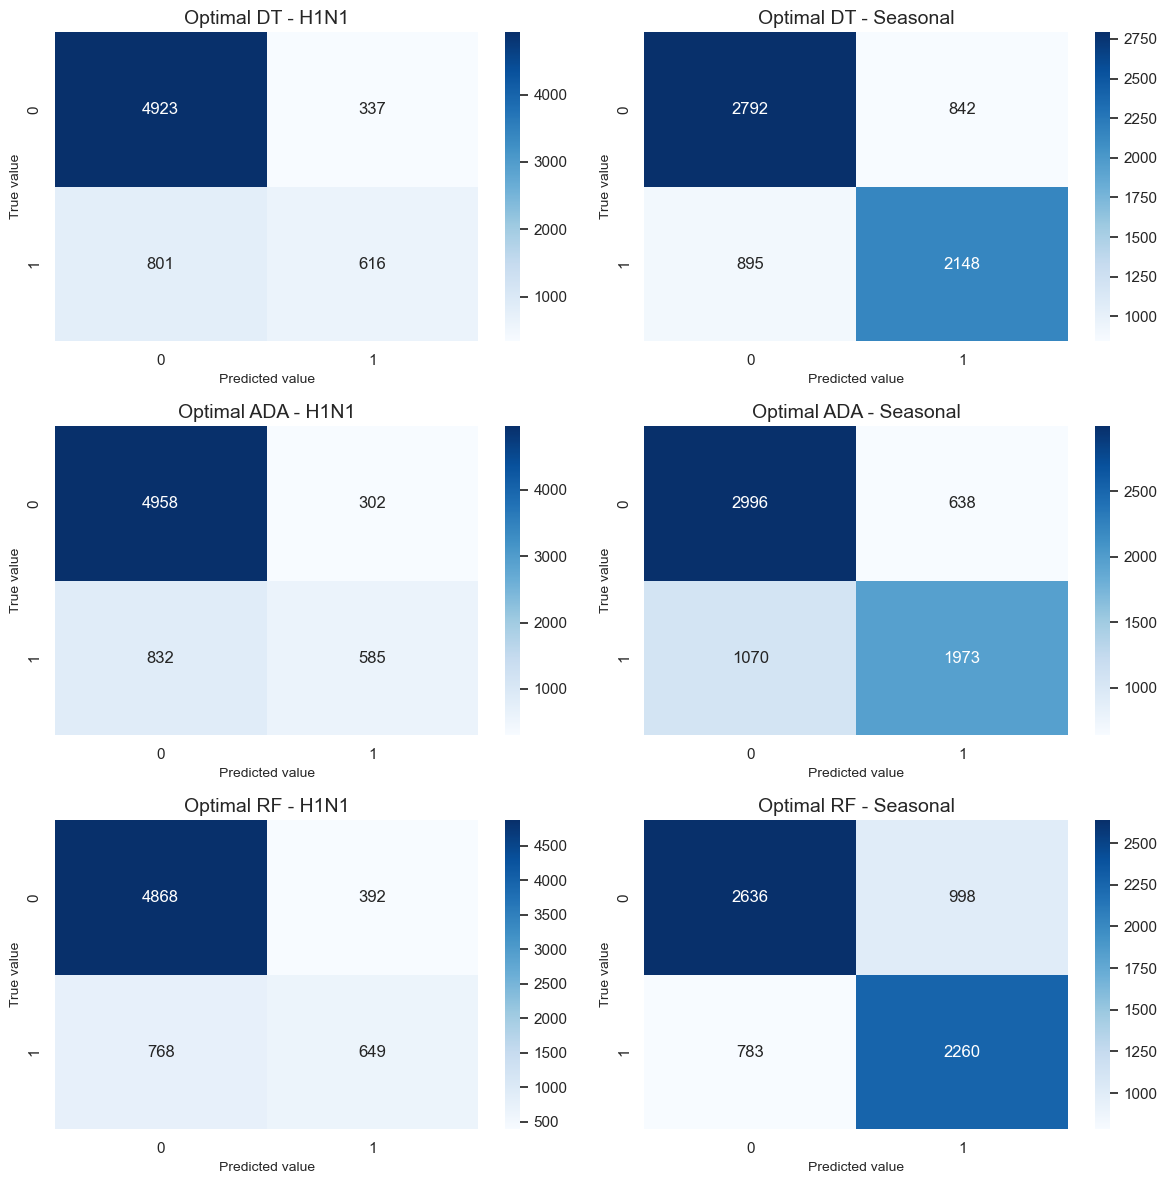

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix


def plot_multilabel_confusion_matrices(model_cm_dict, labels=("H1N1", "Seasonal"), cmap="Blues"):
    n_models = len(model_cm_dict)
    n_rows = n_models
    n_cols = len(labels)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))

    if n_rows == 1:
        axes = axes.reshape(1, -1)

    for i, (model_name, cms) in enumerate(model_cm_dict.items()):
        for j, cm in enumerate(cms):
            ax = axes[i, j]
            sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, ax=ax)
            ax.set_title(f"{model_name} - {labels[j]}", fontsize=14)
            ax.set_xlabel("Predicted value", fontsize=10)
            ax.set_ylabel("True value", fontsize=10)
    
    fig.tight_layout()
    plt.show()


optimal_decision_tree_cm = multilabel_confusion_matrix(
    y_true=y_test,
    y_pred=optimal_decision_tree_pred
)

optimal_adaboost_cm = multilabel_confusion_matrix(
    y_true=y_test,
    y_pred=optimal_ada_boost_y_pred
)

optimal_rf_cm = multilabel_confusion_matrix(
    y_true=y_test,
    y_pred=optimal_random_forest_pred
)

model_cm_dict = {
    "Optimal DT": optimal_decision_tree_cm,
    "Optimal ADA": optimal_adaboost_cm,
    "Optimal RF": optimal_rf_cm
}

plot_multilabel_confusion_matrices(model_cm_dict)

A useful evaluation is looking at the Reciever Operating Characteristic (ROC)-curve. This shows how well a model's predicted probabilities separate positive from negative cases across all thresholds, with the area under the curve (AUC) summarizing this ability as a single number. 0.5 is considered to be random, while 1.0 is a perfect (with curve in the upper left corner). 

In [191]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_single_roc(y_true, y_score, label):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.3f})")

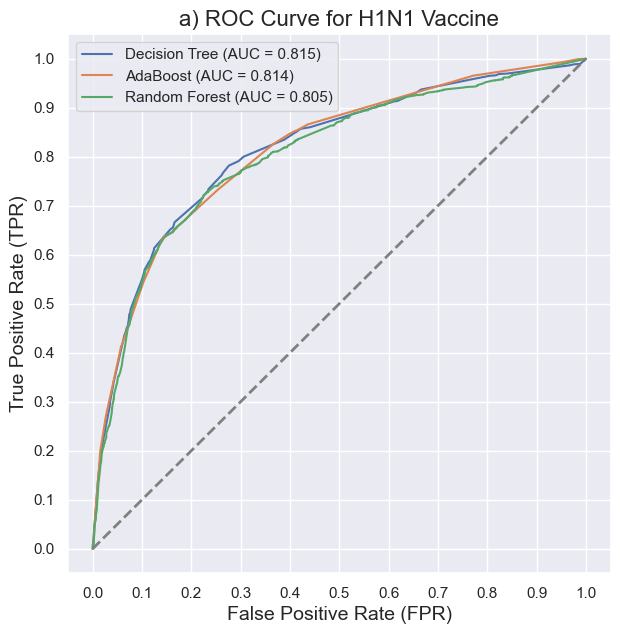

In [192]:
#roc curve for H1N1 

plt.figure(figsize=(7, 7))

plot_single_roc(
    y_test["h1n1_vaccine"],
    optimal_decision_tree_y_preds["h1n1_vaccine"],
    label="Decision Tree"
)

plot_single_roc(
    y_test["h1n1_vaccine"],
    optimal_ada_boost_y_preds["h1n1_vaccine"],
    label="AdaBoost"
)

plot_single_roc(
    y_test["h1n1_vaccine"],
    optimal_random_forest_y_preds["h1n1_vaccine"],
    label="Random Forest"
)

# chance line
plt.plot([0, 1], [0, 1], linestyle="--", color="grey", linewidth=2)

plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.title("a) ROC Curve for H1N1 Vaccine", fontsize=16)

plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.yticks(np.arange(0.0, 1.1, 0.1))

plt.legend()
plt.show()

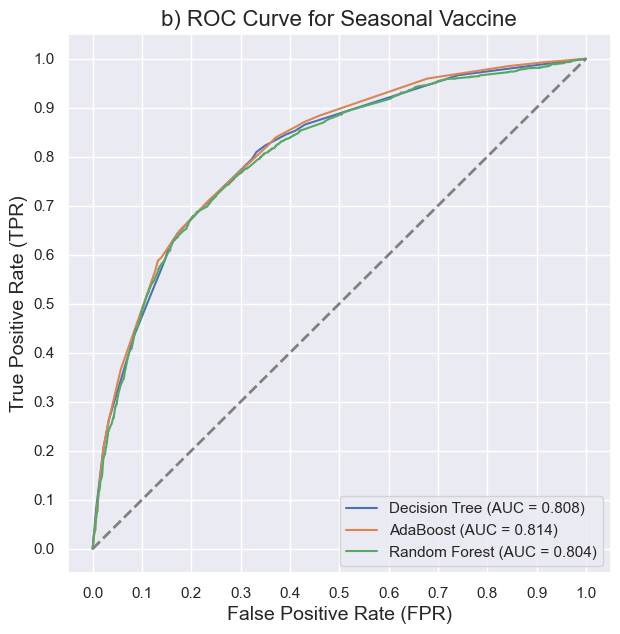

In [193]:
# ROC curve for Seasonal Vaccine

plt.figure(figsize=(7, 7))

plot_single_roc(
    y_test["seasonal_vaccine"],
    optimal_decision_tree_y_preds["seasonal_vaccine"],
    label="Decision Tree"
)

plot_single_roc(
    y_test["seasonal_vaccine"],
    optimal_ada_boost_y_preds["seasonal_vaccine"],
    label="AdaBoost"
)

plot_single_roc(
    y_test["seasonal_vaccine"],
    optimal_random_forest_y_preds["seasonal_vaccine"],
    label="Random Forest"
)

# chance line
plt.plot([0, 1], [0, 1], linestyle="--", color="grey", linewidth=2)

plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.title("b) ROC Curve for Seasonal Vaccine", fontsize=16)

plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.yticks(np.arange(0.0, 1.1, 0.1))

plt.legend()
plt.show()

Reason around the confusion matrices and the ROC-curves for the two different labels and compare the models. 

* Which of the tested classification models is the most suitable to predict vaccination rate of the H1N1 and the Seasonal vaccine?
* Does one vaccine seem easier to predict than the other?
* If you were to continue the work to get a better performance, what could you do differently or add? 

